In [1]:
%matplotlib widget
%matplotlib inline
import os, glob
import subprocess
import astropy.table
import astropy.io.fits as fits
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

#%matplotlib widget

In [2]:
#CLUSTER="ACO1914"
CLUSTER="ACO2151"

In [3]:
reddir="/data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/%s/red"%(CLUSTER)
sexdir=os.path.join(reddir,'config' ,"sextractor")
paramspath = os.path.join(sexdir, "params.txt")
configpath = os.path.join(sexdir, "default_config.txt")
convpath = os.path.join(sexdir, "default_conv.txt")

In [4]:
def runsex(imgpath, configpath, paramspath, convpath, catalogpath, WEIGHT_TYPE="BACKGROUND"):
    cmd = ["sex", imgpath,
           "-c", configpath,
           "-PARAMETERS_NAME", paramspath,
           "-FILTER_NAME", convpath,
           "-CATALOG_NAME", catalogpath,
           "-CATALOG_TYPE", "FITS_LDAC", #"ASCII_HEAD",
           "-GAIN", "2.3", # [e/ADU] when binned (unbinned 1.4)
           "-DETECT_MINAREA", "5.0", # min. nb of pixels above threshold
           "-DETECT_THRESH", "1.5", # threshold, in sigmas
           "-BACK_SIZE", "64",
           "-WEIGHT_TYPE", WEIGHT_TYPE, # default is "NONE"
           #"-WEIGHT_TYPE", "NONE", # default is "NONE",
           "-CHECKIMAGE_TYPE", "BACKGROUND",
           "-CHECKIMAGE_NAME", "background.fits"
          ]

    res = subprocess.run(cmd, text=True, capture_output=True)

    if(res.returncode != 0): # only need to see this if error occur:
        print(res.stderr)

In [5]:
FILTER="R"

In [6]:
sciencefiles=sorted(glob.glob(os.path.join(reddir,"SCIENCE",FILTER,"*.FIT")))

In [7]:
for f in sciencefiles:
    o = os.path.splitext(os.path.basename(f))[0]
    ofile=os.path.join(reddir,"SCIENCE",FILTER,"%s.cat"%(o))
    print(ofile)
    runsex(f, configpath, paramspath, convpath, ofile)

/data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO2151/red/SCIENCE/R/10Light_Red_2x2_180sec_030541.cat
/data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO2151/red/SCIENCE/R/1Light_Red_2x2_180sec_021719.cat
/data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO2151/red/SCIENCE/R/2Light_Red_2x2_180sec_022029.cat
/data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO2151/red/SCIENCE/R/3Light_Red_2x2_180sec_022339.cat
/data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO2151/red/SCIENCE/R/4Light_Red_2x2_180sec_022649.cat
/data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO2151/red/SCIENCE/R/5Light_Red_2x2_180sec_022958.cat
/data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO2151/red/SCIENCE/R/6Light_Red_2x2_180sec_025301.cat
/data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO2151/red/SCIENCE/R/7Light_Red_2x2_180sec_025611.cat
/data/PhD/LECTU

In [8]:
#cat=astropy.table.Table.read(ofile, format="ascii.sextractor")
cat=astropy.table.Table.read(ofile, hdu=2)

In [9]:
cat.info

<Table length=330>
       name        dtype  unit  format 
----------------- ------- ---- --------
           NUMBER   int32        {:10d}
            FLAGS   int16         {:3d}
          X_IMAGE float32  pix {:11.4f}
          Y_IMAGE float32  pix {:11.4f}
          A_IMAGE float32  pix  {:9.3f}
          B_IMAGE float32  pix  {:9.3f}
      THETA_IMAGE float32  deg  {:6.2f}
       XWIN_IMAGE float64  pix {:11.4f}
       YWIN_IMAGE float64  pix {:11.4f}
    ERRAWIN_IMAGE float32  pix  {:9.5f}
    ERRBWIN_IMAGE float32  pix  {:9.5f}
ERRTHETAWIN_IMAGE float32  deg  {:6.2f}
       FWHM_IMAGE float32  pix  {:8.2f}
      FLUX_RADIUS float32  pix {:10.3f}
       BACKGROUND float32   ct {:12.7g}
         FLUX_ISO float32   ct {:12.7g}
      FLUXERR_ISO float32   ct {:12.7g}
          MAG_ISO float32  mag  {:8.4f}
       MAGERR_ISO float32  mag  {:8.4f}
        FLUX_AUTO float32   ct {:12.7g}
     FLUXERR_AUTO float32   ct {:12.7g}
         MAG_AUTO float32  mag  {:8.4f}
      MAGERR_AUTO flo

In [10]:
cat.colnames

['NUMBER',
 'FLAGS',
 'X_IMAGE',
 'Y_IMAGE',
 'A_IMAGE',
 'B_IMAGE',
 'THETA_IMAGE',
 'XWIN_IMAGE',
 'YWIN_IMAGE',
 'ERRAWIN_IMAGE',
 'ERRBWIN_IMAGE',
 'ERRTHETAWIN_IMAGE',
 'FWHM_IMAGE',
 'FLUX_RADIUS',
 'BACKGROUND',
 'FLUX_ISO',
 'FLUXERR_ISO',
 'MAG_ISO',
 'MAGERR_ISO',
 'FLUX_AUTO',
 'FLUXERR_AUTO',
 'MAG_AUTO',
 'MAGERR_AUTO']

In [11]:
len(cat)

330

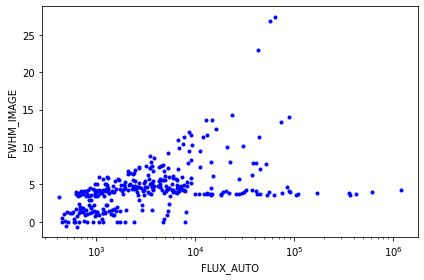

In [12]:
(fig, ax) = plt.subplots()
ax.plot(cat["FLUX_AUTO"], cat["FWHM_IMAGE"], "b.") # "b." -> blue dots
ax.set_xlabel("FLUX_AUTO")
ax.set_ylabel("FWHM_IMAGE")
ax.set_xscale("log") # log scale for flux!
fig.tight_layout()

In [13]:
maxflux=2*1e4
catstars=cat[cat["FLUX_AUTO"]>maxflux]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(catstars["FLUX_AUTO"],catstars["FWHM_IMAGE"])

In [14]:
fwhmstars = intercept
pixelscale_camera=0.413 #arcsec
binning_camera=2
pixelscale=binning_camera*pixelscale_camera
print("Seeing in arcsec:", fwhmstars * 2 * 0.413)

Seeing in arcsec: 6.425259561420062


In [15]:
imagearray=fits.getdata(f)

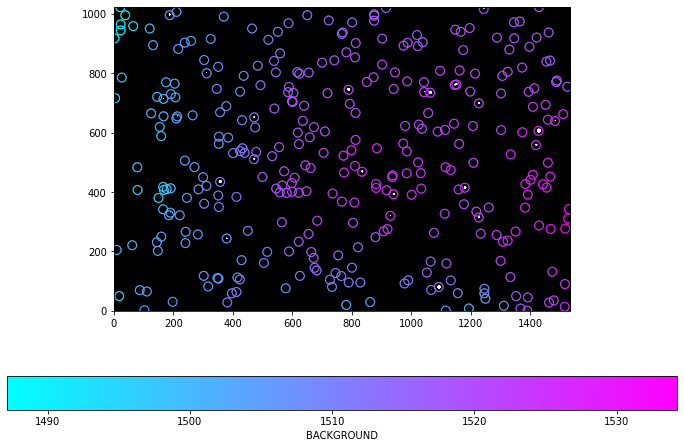

In [16]:
field="BACKGROUND"#"FLUX_AUTO" #"FWHM_IMAGE"
fig = plt.figure(figsize=(12, 8))
ax = fig.subplots()
ax.imshow(imagearray, cmap="gray", vmin=1950, vmax=2300, origin="lower")
ax.set_xlim(auto=False) # Prevent limits from adapting to "scatter()"... 
ax.set_ylim(auto=False) # ... to accommodate sources on the image edges
scatter=ax.scatter(
    cat["X_IMAGE"]-1, cat["Y_IMAGE"]-1, # -1: SExtractor convention
    c=cat[field], s=100, marker="$\u25EF$", linewidths=.5, cmap='cool')
cbar = fig.colorbar(scatter, ax=ax, orientation="horizontal")
cbar.set_label(field)
#fig.tight_layout()

(1024, 1536)
2015.0385 2075.1958


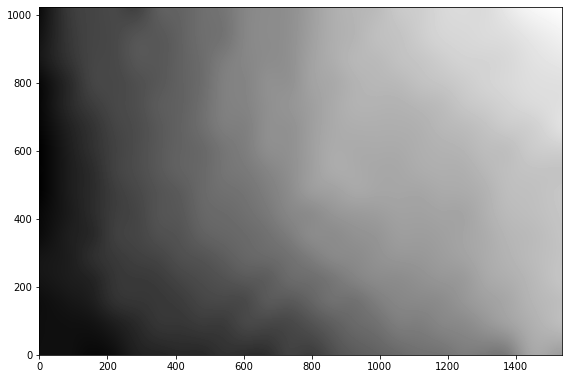

In [17]:
back = fits.getdata("background_64.fits")
print(back.shape)
print(np.min(back), np.max(back))
fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()
ax.imshow(back, cmap="gray", origin="lower")
fig.tight_layout()

# extrastuff

In [18]:
reddir="/data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO1914/red"
sexdir=os.path.join(reddir,'config' ,"sextractor")
paramspath = os.path.join(sexdir, "params.txt")
configpath = os.path.join(sexdir, "default_config.txt")
convpath = os.path.join(sexdir, "default_conv.txt")

In [19]:
sciencefiles[0]

'/data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO2151/red/SCIENCE/R/10Light_Red_2x2_180sec_030541.FIT'

In [20]:
f = sciencefiles[0]
o = os.path.splitext(os.path.basename(f))[0]
ofile=os.path.join("%s_noweight.cat"%(o))
print(ofile)
runsex(f, configpath, paramspath, convpath, ofile, WEIGHT_TYPE="NONE")

10Light_Red_2x2_180sec_030541_noweight.cat


150 150


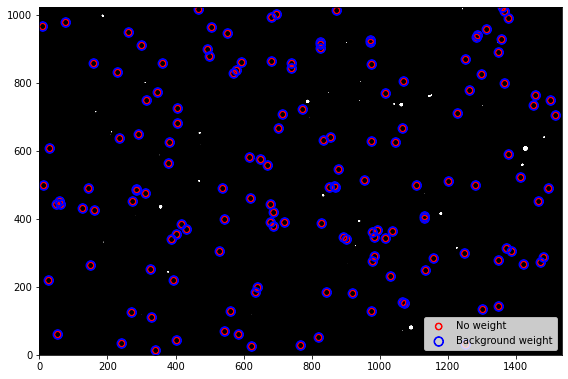

In [21]:
# Attempt to compare "NONE" vs "BACKGROUND" weight: no nice results
cat_noweight = astropy.table.Table.read("SCIENCE_B.00000001.Cursor_position_noweight.cat", hdu=2)
cat_backweight = astropy.table.Table.read("SCIENCE_B.00000001.Cursor_position.cat", hdu=2)
print(len(cat_noweight), len(cat_backweight))

fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()
ax.imshow(imagearray, cmap="gray", vmin=1950, vmax=2300, origin="lower")
ax.set_xlim(auto=False) # To avoid ugly lims due to sources on edges
ax.set_ylim(auto=False)
scatter_noweight = ax.scatter(cat_noweight["X_IMAGE"]-1, cat_noweight["Y_IMAGE"]-1, color="red", s=50,marker="$\u25EF$", linewidths=1, label="No weight")

catter_backweight = ax.scatter(cat_backweight["X_IMAGE"]-1, cat_backweight["Y_IMAGE"]-1, color="blue", s=100,marker="$\u25EF$", linewidths=1, label="Background weight")
ax.legend()
fig.tight_layout()